In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_,m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1=W1.dot(X) + b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1) + b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2,X, Y):
    m =  Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 =  1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 =  1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2 , b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def garadient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2,W1, W2, X, Y)
        W1, b1, W2 , b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iterations: ",i)
            predictions = get_predictions(A2) 
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = garadient_descent(X_train, Y_train, 500, 0.1)

Iterations:  0
[6 6 7 ... 6 6 6] [8 1 2 ... 7 2 0]
Accuracy:  0.09546341463414634
Iterations:  10
[3 1 1 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.2824390243902439
Iterations:  20
[3 1 1 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.3968536585365854
Iterations:  30
[7 1 7 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.4650975609756098
Iterations:  40
[7 1 7 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.500780487804878
Iterations:  50
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.5597560975609757
Iterations:  60
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.6380975609756098
Iterations:  70
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.6996585365853658
Iterations:  80
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.7397073170731707
Iterations:  90
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.7653658536585366
Iterations:  100
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.7860975609756098
Iterations:  110
[8 1 8 ... 7 6 0] [8 1 2 ... 7 2 0]
Accuracy:  0.8009024390243903
Iterations:  12

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


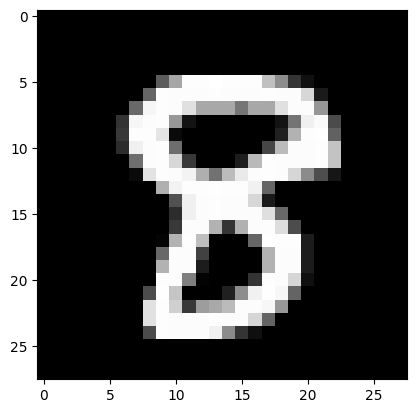

Prediction:  [1]
Label:  1


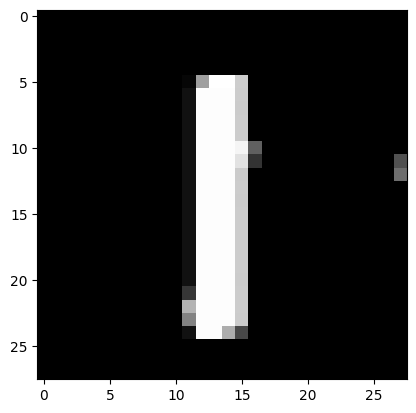

Prediction:  [8]
Label:  2


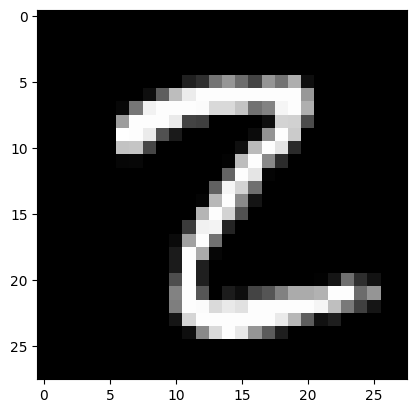

Prediction:  [1]
Label:  1


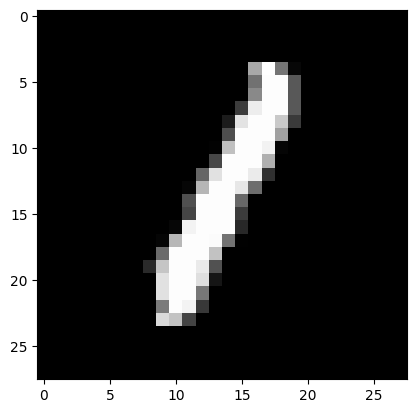

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 5 2 0 2 6 5 6 8 6 6 7 8 2 8 6 9 1 1 4 8 2 7 8 8 7 2 6 2 4 9 9 4 7 6 1 9
 5 8 6 3 7 7 8 7 9 3 3 0 3 2 8 9 3 4 0 0 9 6 3 5 8 9 4 1 6 0 7 9 4 2 2 0 1
 2 5 0 5 0 5 3 4 8 9 9 1 9 6 7 5 6 8 6 7 3 0 9 3 0 9 0 0 8 1 5 5 0 8 4 3 9
 9 6 3 9 5 9 3 6 8 0 1 1 1 9 3 4 5 0 5 4 3 7 1 9 9 0 9 5 5 6 0 5 8 9 8 1 2
 3 0 8 7 0 2 7 6 5 4 0 9 0 0 8 7 9 8 2 3 7 8 5 0 9 3 6 1 5 9 7 5 0 1 6 7 2
 1 6 9 3 9 9 8 3 2 9 6 9 2 6 7 9 0 3 6 4 4 9 6 3 4 9 3 6 7 7 4 9 7 9 1 6 7
 8 1 8 6 0 5 9 4 1 0 1 1 4 4 8 8 1 8 4 2 1 7 3 0 6 6 2 7 6 2 2 4 1 7 1 7 4
 7 3 6 0 4 6 2 4 5 0 1 1 4 9 9 6 6 3 0 1 8 6 0 6 7 8 8 9 7 7 0 9 4 5 5 6 6
 0 7 9 0 0 7 1 0 1 5 8 8 6 1 2 9 5 8 9 4 9 1 7 9 0 3 4 4 8 9 1 0 9 6 8 0 1
 0 0 2 8 0 7 9 0 2 9 6 3 3 2 0 3 5 0 1 8 2 6 8 9 8 9 3 5 0 3 7 5 3 0 9 0 7
 1 0 7 1 4 7 8 0 3 2 3 7 1 6 1 7 7 3 7 1 8 7 1 1 2 4 0 4 3 0 8 8 7 2 2 1 4
 6 6 8 1 2 0 2 7 5 6 3 9 1 0 7 7 3 2 6 3 1 4 0 7 6 1 5 0 9 2 5 2 0 1 2 3 5
 4 0 4 5 6 1 1 2 2 2 1 2 4 4 4 6 3 2 0 2 0 5 4 6 3 7 2 9 2 8 4 1 2 1 2 7 5
 1 4 2 1 7 1 6 3 3 1 1 9 

0.918